##Multilayer Perceptron

In [ ]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dataset.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#Atributos escolhidos foram Salário (Estimated Salary) e idade (Age)

In [ ]:
X = dataset.iloc[:,2:4].values
y = dataset['Purchased'].values

#Dividindo conjunto para ser treinado

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Normalizando esse conjunto

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#Treinamento do conjunto normalizado

In [ ]:
import tensorflow as tf

classifier = tf.keras.models.Sequential()

classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Treinamento em sí

In [16]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 120)

Epoch 1/120
300/300 [==============================] - 0s 863us/step - loss: 0.3512 - accuracy: 0.8300
Epoch 2/120
300/300 [==============================] - 0s 949us/step - loss: 0.3524 - accuracy: 0.8300
Epoch 3/120
300/300 [==============================] - 0s 926us/step - loss: 0.3519 - accuracy: 0.8367
Epoch 4/120
300/300 [==============================] - 0s 926us/step - loss: 0.3520 - accuracy: 0.8133
Epoch 5/120
300/300 [==============================] - 0s 969us/step - loss: 0.3520 - accuracy: 0.8267
Epoch 6/120
300/300 [==============================] - 0s 955us/step - loss: 0.3512 - accuracy: 0.8300
Epoch 7/120
300/300 [==============================] - 0s 943us/step - loss: 0.3513 - accuracy: 0.8267
Epoch 8/120
300/300 [==============================] - 0s 931us/step - loss: 0.3504 - accuracy: 0.8233
Epoch 9/120
300/300 [==============================] - 0s 982us/step - loss: 0.3505 - accuracy: 0.8167
Epoch 10/120
300/300 [==============================] - 0s 892us/step - l

#Verificando a eficiência do modelo

In [17]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[[3.75390649e-02]
 [7.86729455e-02]
 [1.26921594e-01]
 [2.10820436e-02]
 [2.22170055e-02]
 [7.17702278e-05]
 [2.89231539e-04]
 [7.96322942e-01]
 [5.09432648e-05]
 [6.27082229e-01]
 [2.31692195e-03]
 [1.49759650e-03]
 [7.37389028e-02]
 [4.63647932e-01]
 [4.38600779e-04]
 [4.31134641e-01]
 [2.89591789e-01]
 [2.61992216e-04]
 [9.23188448e-01]
 [2.83432007e-03]
 [1.78604126e-02]
 [8.90143514e-01]
 [2.56858587e-01]
 [8.47370744e-01]
 [2.51336769e-05]
 [8.99855733e-01]
 [1.58794522e-02]
 [1.47001445e-02]
 [1.18057758e-01]
 [8.04874599e-02]
 [7.90864229e-04]
 [3.21063340e-01]
 [8.74392748e-01]
 [6.42176867e-02]
 [3.20553780e-04]]


In [18]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred_bin =  np.array(y_pred_bin)
print(y_test[0:35])
print(y_pred_bin[0:35])

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
Acurácia:  89.0 %


#Matriz de confusão

In [20]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(matriz_confusao)

Matrix de confusão: 
[[61  7]
 [ 4 28]]


#Mostrando resultados de forma gráfica

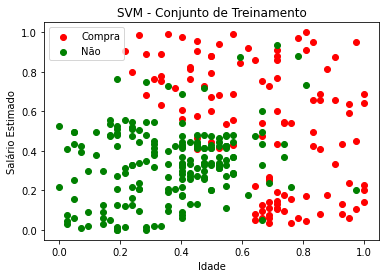

In [21]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

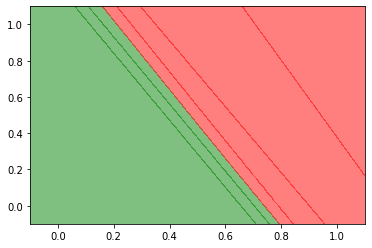

In [22]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

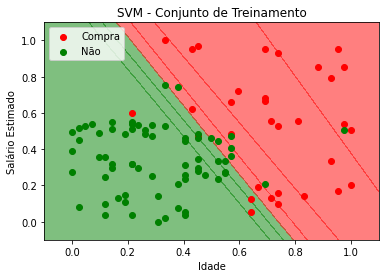

In [23]:
age_neg = X_test[y_test == 0, 0]
salary_neg = X_test[y_test == 0, 1]
age_pos = X_test[y_test == 1, 0]
salary_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()